In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
data = np.loadtxt('base1.txt')

In [36]:
data

array([[-4.23809e-01,  1.73816e-01,  1.00000e+00],
       [-7.32064e-01, -7.98200e-02,  1.00000e+00],
       [-2.84335e-01,  7.17345e-01,  1.00000e+00],
       [-2.43749e-01,  3.41101e-01,  1.00000e+00],
       [-6.02286e-01,  5.52602e-01,  1.00000e+00],
       [-1.79390e-02,  5.29274e-01,  1.00000e+00],
       [-1.83770e-02,  4.76127e-01,  1.00000e+00],
       [-3.25077e-01,  2.19774e-01,  1.00000e+00],
       [-2.33845e-01,  2.33974e-01,  1.00000e+00],
       [-2.72008e-01,  3.77153e-01,  1.00000e+00],
       [-3.62345e-01,  1.74289e-01,  1.00000e+00],
       [-1.34221e-01,  2.06785e-01,  1.00000e+00],
       [-4.62747e-01,  8.38880e-01,  1.00000e+00],
       [ 2.30128e-01,  4.84696e-01,  1.00000e+00],
       [-3.49767e-01,  1.66431e-01,  1.00000e+00],
       [-2.87185e-01,  4.60453e-01,  1.00000e+00],
       [-4.89760e-02,  1.88674e-01,  1.00000e+00],
       [-3.00848e-01,  1.33441e-01,  1.00000e+00],
       [-3.39580e-01,  4.05485e-01,  1.00000e+00],
       [-5.23756e-01,  7.09127e

## 2. Codage

In [37]:
class myKnn:
    def __init__(self):
        self.train = None
        self.labels = None
        
    def apprentissage(self, X, y):
        '''
        lazy
        '''
        self.train = X
        self.labels = y
        
    def predict(self, X):
        predictions = []
        
        for test_sample in X:
            distances = []
            for train_sample in self.train:
                distances.append(distance_euclidienne(test_sample, train_sample))
            nearest_train_samples = np.argsort(distances)
        
            nearest_classes = []
        
            nearest_classes.append(self.labels[nearest_train_samples[0]])
            predictions.append(nearest_classes[0])
       
        return np.array(predictions)

In [42]:
class MyKmeans:
   
    def __init__(self, k, max_iter=100, verbose=False, random_state=42):
        self.k = k
        self.verbose = verbose
        self.rs = random_state
        self.centroids = None
        self.max_iter = max_iter
        self.labels = []
        self.classes = None
        self.inertia = None
        
        for c in range(self.k):
            self.labels.append('cluster {}'.format(c+1))
            
        if verbose:
            print('*****  Initialisation de notre la classe MyKmeans avec {} clusters  *****'.format(self.k))
            print('\tmax_iter: \t', self.max_iter)
            print('\tlabels: \t', self.labels)
            print('\trandom state: \t', self.rs)
            print('\tverbose: \t', self.verbose)                                 
            print('******************************************************')
    
    def fit(self, X):
        '''
        desc: This function trains kmeans on X with k clusters
            
        '''
        # init des centroids
        ranges = []
        for j in range(len(X.columns)):
            ranges.append([X.min(0)[j], X.max(0)[j]])
      
        self.init_centroids(ranges)
        
     
        A = X.iloc[:,0:len(X.columns)].values 
        knn = myKnn()
        
        
        flag = False 
        
        for tour in range(self.max_iter):
         
            knn.apprentissage(self.centroids, self.labels)
            current_clusters = knn.predict(A) 
            
            
            initlist=[0] * len(X.columns)
            new_centers = [pd.DataFrame([initlist])] * self.k
            
            #on retire la premiere ligne d'initialisation dans chacun des clusters
            for i in range(self.k): #pour chaque cluster de la liste de clusters,
                new_centers[i] = new_centers[0].iloc[1:,:] 
            
            #on ajoute les points qui font parti d'un tel cluster dans la list de dataframe respectivement
            for e in range(len(A)):
                for j in range(len(self.labels)):
                    if current_clusters[e] == self.labels[j]:
                        new_centers[j]=new_centers[j].append(pd.DataFrame(A[e]).transpose()) 
            
            
            #parcours de la liste de DataFrame afin d'en faire leur moyenne respectivement
            #on a maintenant une liste des moyennes de chaque cluster correspondant au nouveau centroïd 
            for r in range(len(new_centers)):
                new_centers[r]=np.mean(new_centers[r], axis=0).values 
            
            class_of_current_clusters = self.labels 
            
            
            count_true = 0 #on compte le nombre de clusters qui n'ont pas bougé
            for m in range(len(self.centroids)):

                if (self.centroids[m] == new_centers[m]).all():      #Test de sortie, si les centroids n'ont pas bougé
                    count_true+=1
                    if count_true == len(self.centroids): #si tous les clusters n'ont pas bougé
                        flag = True
                        break
            
            count_true = 0 #reset
            
            if flag == True:
                break
            
            self.centroids = new_centers 
            new_centers = [] #reinitilisation des futurs centroids
            

        self.classes = current_clusters 
        
        self.ssd(X)
        self.predict(X)
        
        if self.verbose:
            print('Model entrainé avec {} iterations...'.format(tour+1))
            print('Inertia : ', self.inertia)
        
        
    def init_centroids(self, ranges):
       
    
    
        np.random.seed(self.rs)
        
      
        self.centroids = []
        temp = []
        for i in range(len(ranges)):
                temp.append(list(np.random.uniform(ranges[i][0], ranges[i][1], self.k)))
        temp = np.array(temp)
        temp_inv = np.transpose(temp).tolist()
        self.centroids = temp_inv
        
       
        return self.centroids
    
    
    def ssd(self, X):
       
    
        res=0
        distances_each_cluster = [0] * self.k 
        
        A = X.iloc[:,0:len(X.columns)].values 
        
        for e in range(len(A)): #pour toutes les données Xi
            for j in range(len(self.labels)): #pour tous les clusters
                if self.classes[e] == self.labels[j]: #si la donnée appartient à un tel cluster
                    distances_each_cluster[j] += (distance_euclidienne(X.values[e], self.centroids[j])) ** 2
        
        for i in range(len(distances_each_cluster)):
            res+=distances_each_cluster[i]
        
        self.inertia = res
        
    def predict(self,X):
        
        
        predictions = self.classes
        
        return predictions

In [40]:
def distance_euclidienne(pt1, pt2):
  
    if not isinstance(pt1, np.ndarray) and not isinstance(pt2, np.ndarray):
        raise TypeError("#")
    if(len(pt1)!=len(pt2)):
        raise ValueError("#")
    else:
        return np.sqrt(np.sum((pt1 - pt2)**2))

-	Initialisation aléatoire
      -	Affectation des clusters.
      -	Mise à jour centroïdes.
      - Itérations et condition d’arrêt.


In [43]:
kmean = MyKmeans(3, 100, True, 42)

*****  Initialisation de notre la classe MyKmeans avec 3 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3']
	random state: 	 42
	verbose: 	 True
******************************************************


In [44]:
model = kmean.fit(pd.DataFrame(data))

Model entrainé avec 100 iterations...
Inertia :  125.487984098442


In [15]:
import seaborn as sns
sns.set()

C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


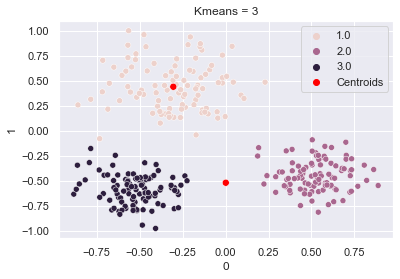

In [45]:
sns.scatterplot(pd.DataFrame(data).iloc[:,0].values, pd.DataFrame(data).iloc[:,1].values, hue=pd.DataFrame(data).iloc[:,2].values)
sns.set_palette(['red'])
sns.scatterplot(pd.DataFrame(kmean.centroids).iloc[:,0], pd.DataFrame(kmean.centroids).iloc[:,1], hue=['Centroids']*len(kmean.centroids), s=50)
plt.title('Kmeans = {}'.format(kmean.k))
plt.show()

## 3.) EVALUATION

1)	Utiliser (toujours sur base1) la méthode avec différentes valeurs de k. Pour chaque valeur de k : 
   - Observer la distribution des données autour des barycentres ;


**On remarque que la valeur de la fonction decroissant du cout Inertia diminue lorsque k augmente.
On remarque également que plus k augmente et se rapproche de sa valeur optimale plus les points (en rouge) qui reprensentent nos centroids se rapprochent des barycentres (centroids) de nos clusters.ET losque la valeur optimale de k est depassée ces points (centroids) ne se déplacent plus**

2 )
-	Pour chaque valeur de k :
       - Réaliser 5 initialisations 
       - Afficher le coût moyen et utiliser la méthode du coude (ou le critère de Calinski/Harabasz) pour déterminer la               valeur optimale de k.
       - Vérifier la stabilité de l’algorithme (convergence vers les mêmes centroïdes).


*****  Initialisation de notre la classe MyKmeans avec 1 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 2 iterations...
Inertia :  343.0664053479414
*****  Initialisation de notre la classe MyKmeans avec 2 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 2 iterations...
Inertia :  274.2931295502229
*****  Initialisation de notre la classe MyKmeans avec 3 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 100 iterations...
Inertia :  125.487984098442
*****  Initialisation de notre la classe MyKmeans avec 4 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3', 'cl

Text(0, 0.5, 'Cout du modele (Inertia)')

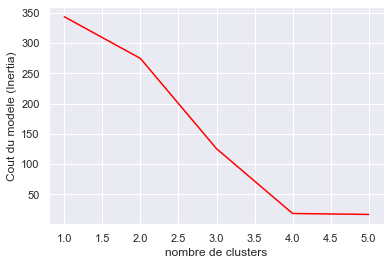

In [46]:
# Liste contenant le couts des différents modeles pour chaque valeur de K itérée
inertia = []
K_range = range(1, 6)
for k in K_range:
    kmean = MyKmeans(k, 100, True, 42)
    model = kmean.fit(pd.DataFrame(data))
    inertia.append(kmean.inertia)

#Tracé d'un graphique et visualisation d'une zone de coudes
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

**-Conclure sur la meilleure valeur pour k.**

La meilleure valeur pour k correspond à un changement important de la pente de la courbe avant qu'elle devienne quasi constante.

Ici, pour moi, la meilleure valeur de k correspondrait à k = 4.

-	Vérifier la stabilité de l’algorithme (convergence vers les mêmes centroïdes).

*****  Initialization of Kmeans with 4 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']
	random state: 	 42
	verbose: 	 True
******************************************************
Model trained in 100 iterations...
Inertia :  18.653750822565367


C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


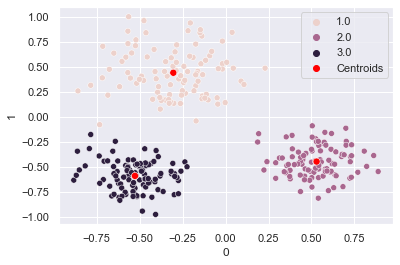

In [22]:
kmeanOp = MyKmeans(4, 100, True, 42)
modelOp = kmeanOp.fit(pd.DataFrame(data))
sns.scatterplot(pd.DataFrame(data).iloc[:,0].values, pd.DataFrame(data).iloc[:,1].values, hue=pd.DataFrame(data).iloc[:,2].values)
sns.set_palette(['red'])
sns.scatterplot(pd.DataFrame(kmeanOp.centroids).iloc[:,0], pd.DataFrame(kmeanOp.centroids).iloc[:,1], hue=['Centroids']*len(kmeanOp.centroids), s=50)
#plt.title('Kmeans = {}'.format(kmeanOp.k))

plt.show()

***On constate qu'effectivement que pour K=4 est la valeur optimale. En cette valeur, les centroids convergent vers le 
barycentre de chaque cluster rendant ainsi notre algorithme stable***

-	Vérifier la stabilité de l’algorithme (convergence vers les mêmes centroïdes).


### 3)	Répéter les expérimantions précédentes sur base3

In [49]:
data = np.loadtxt('base3.txt')

In [50]:
data

array([[-0.208829,  0.136592,  1.      ],
       [-0.425751, -0.054918,  1.      ],
       [-0.247043,  0.270194,  1.      ],
       ...,
       [ 0.194124, -0.378072,  4.      ],
       [ 0.260869, -0.277765,  4.      ],
       [ 0.324631, -0.224242,  4.      ]])

**Utilisation de notre class myKmean**

2 )
-	Pour chaque valeur de k :
       - Réaliser 5 initialisations 
       - Afficher le coût moyen et utiliser la méthode du coude (ou le critère de Calinski/Harabasz) pour déterminer la               valeur optimale de k.
       - Vérifier la stabilité de l’algorithme (convergence vers les mêmes centroïdes).


In [51]:
kmean = MyKmeans(3, 100, True, 42)


*****  Initialisation de notre la classe MyKmeans avec 3 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3']
	random state: 	 42
	verbose: 	 True
******************************************************


In [45]:
import seaborn as sns
sns.set()

C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\moham\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


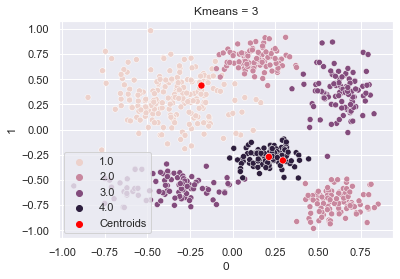

In [46]:
sns.scatterplot(pd.DataFrame(data).iloc[:,0].values, pd.DataFrame(data).iloc[:,1].values, hue=pd.DataFrame(data).iloc[:,2].values)
sns.set_palette(['red'])
sns.scatterplot(pd.DataFrame(kmean.centroids).iloc[:,0], pd.DataFrame(kmean.centroids).iloc[:,1], hue=['Centroids']*len(kmean.centroids), s=50)
plt.title('Kmeans = {}'.format(kmean.k))

plt.show()

2 )
-	Pour chaque valeur de k :
       - Réaliser 5 initialisations 
       - Afficher le coût moyen et utiliser la méthode du coude (ou le critère de Calinski/Harabasz) pour déterminer la               valeur optimale de k.
       - Vérifier la stabilité de l’algorithme (convergence vers les mêmes centroïdes).


*****  Initialisation de notre la classe MyKmeans avec 1 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 2 iterations...
Inertia :  1061.078583792898
*****  Initialisation de notre la classe MyKmeans avec 2 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 4 iterations...
Inertia :  456.45578634109677
*****  Initialisation de notre la classe MyKmeans avec 3 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 2 iterations...
Inertia :  322.5215645111274
*****  Initialisation de notre la classe MyKmeans avec 4 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3', 'cl

Text(0, 0.5, 'Cout du modele (Inertia)')

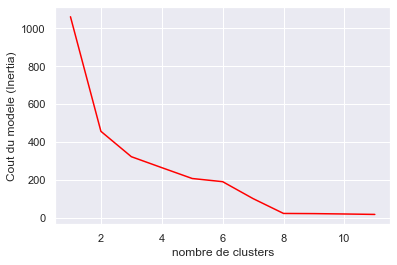

In [53]:
# Liste contenant le couts des différents modeles pour chaque valeur de K itérée
inertia = []
K_range = range(1, 12)
for k in K_range:
    kmean = MyKmeans(k, 100, True, 42)
    model = kmean.fit(pd.DataFrame(data))
    inertia.append(kmean.inertia)

#Tracé d'un graphique et visualisation d'une zone de coudes
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

**-	Vérifier la stabilité de l’algorithme (convergence vers les mêmes centroïdes).**
     ***la Valeur Optimale de K est 8***

*****  Initialisation de notre la classe MyKmeans avec 8 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3', 'cluster 4', 'cluster 5', 'cluster 6', 'cluster 7', 'cluster 8']
	random state: 	 42
	verbose: 	 True
******************************************************
Model entrainé avec 7 iterations...
Inertia :  22.992807683408518


C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Arthur Atonleu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


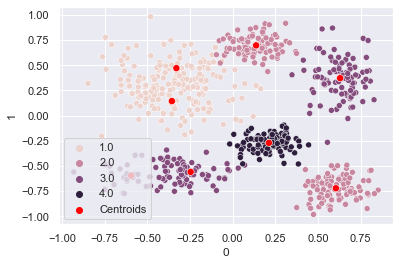

In [56]:
kmeanOp1 = MyKmeans(8, 100, True, 42)
modelOp1 = kmeanOp1.fit(pd.DataFrame(data))
sns.scatterplot(pd.DataFrame(data).iloc[:,0].values, pd.DataFrame(data).iloc[:,1].values, hue=pd.DataFrame(data).iloc[:,2].values)
sns.set_palette(['red'])
sns.scatterplot(pd.DataFrame(kmeanOp1.centroids).iloc[:,0], pd.DataFrame(kmeanOp1.centroids).iloc[:,1], hue=['Centroids']*len(kmeanOp1.centroids), s=50)
#plt.title('Kmeans = {}'.format(kmeanOp.k))

plt.show()

## 4.	Application 

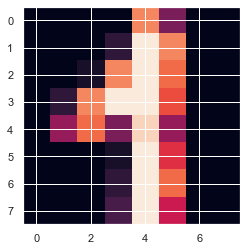

In [25]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import scale

digits = load_digits()
images = digits.images
X = scale(digits.data)
y = digits.target
#samples, features = data.shape

plt.imshow(images[42])

In [26]:
x_train, x_test = train_test_split(X, train_size=0.7, random_state=0)

In [27]:
y_train, y_test = train_test_split(y, train_size=0.7, random_state=0)

In [13]:
kmean2 = MyKmeans(3, 100, True, 42)

*****  Initialization of Kmeans with 3 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3']
	random state: 	 42
	verbose: 	 True
******************************************************


#### Clustering

In [21]:
def purity(model, name, data):
    model.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, model.inertia_,
             metrics.homogeneity_score(y_train, model.labels_),
             metrics.completeness_score(y_train, model.labels_),
             metrics.v_measure_score(y_train, model.labels_),
             metrics.adjusted_rand_score(y_train, model.labels_),
             metrics.adjusted_mutual_info_score(y_train,  model.labels_),
             metrics.silhouette_score(data, model.labels_,
                                      metric='euclidean')))

In [22]:
model2 = KMeans(n_clusters=10)
purity(model2, "Dégré de puréte de chaque pi", x_train)

Dégré de puréte de chaque pi	47859	0.555	0.654	0.600	0.407	0.594	0.139


In [133]:
from scipy.cluster.vq import kmeans,vq
K_MAX = 10
KK = range(1,K_MAX+1)
KM = [kmeans(x_train,k) for k in KK]
centroids = [cent for (cent,var) in KM]
D_k = [cdist(x_train, cent, 'euclidean') for cent in centroids]
dist = [np.min(D,axis=1) for D in D_k]
totss = sum(pdist(x_train)**2)/x_train.shape[0] 

Variances du cluster p

**Classification :**
Utiliser l’algorithme des k-moyennes pour déterminer, dans chaque classe, k’ centroïdes (k’ = 1, 2, …).

 #### K-means algorithm (Utilisation de notre algorithme myKmeans)

In [6]:
kmean = MyKmeans(3, 100, True, 42)

*****  Initialization of Kmeans with 3 clusters  *****
	max_iter: 	 100
	labels: 	 ['cluster 1', 'cluster 2', 'cluster 3']
	random state: 	 42
	verbose: 	 True
******************************************************


In [12]:
kmean.fit(pd.DataFrame(x_train))

Model trained in 100 iterations...
Inertia :  75169.73918566939


In [13]:
print(kmean.centroids)

[array([ 0.00000000e+00,  2.95913385e-02,  2.14551565e-02, -6.37352567e-03,
       -4.71086541e-03,  1.15013467e-02, -2.07286504e-03, -6.70274907e-03,
        1.36513877e-04,  6.65381924e-03,  1.35381298e-03,  3.74397410e-02,
        2.02330189e-02,  1.26817897e-02, -7.83304371e-03, -1.29838724e-02,
       -1.90661070e-02, -1.73735956e-02, -1.09918242e-02,  2.40482790e-02,
        3.23732457e-03, -2.95308059e-03, -1.21303835e-02, -3.37053037e-03,
       -3.33797263e-02, -3.65721530e-03, -3.02945121e-03,  9.73030761e-04,
       -1.28922031e-02, -1.46716383e-02,  1.82092042e-02, -1.34170074e-02,
        0.00000000e+00,  6.63767574e-03, -1.07576695e-02, -4.20767032e-03,
       -1.04138300e-02, -1.74788381e-02,  1.55106142e-02,  0.00000000e+00,
        1.00233355e-02,  1.15988443e-02,  1.11859004e-02,  1.18368541e-02,
        1.51969771e-02, -1.27085708e-02, -3.04898470e-02,  9.79989141e-03,
        3.59436406e-03,  1.86428920e-02,  1.74770436e-02,  2.42854409e-02,
        3.43655430e-02, 

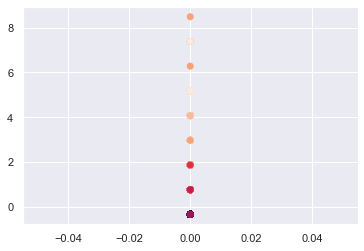

In [32]:
plt.scatter(x_train[:,0], x_train[:,1],c=x_train[:,2])

Utiliser l’algorithme du plus-proche-voisin pour classer la base de test en utilisant comme base d’apprentissage les 10k’ centroïdes précédents. 

In [ ]:
NN1 = KNeighborsClassifier(n_neighbors=1)
NN1.fit(Centroid, y_Centroid)
NN1.score(X)